# Import Packages

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

# Load in Data

In [26]:
YouTube = pd.read_csv('C:/Users/meredith.dodd/Documents/Data Science/105 Intermediate Statistics/Lesson 3/YouTubeChannels_Python.csv')

In [59]:
YouTube.head()

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843
2,3rd,0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,0,SET India,27323,31180559,22675948293
4,5th,0,WWE,36756,32852346,26273668433


# Wrangle the Data

## Only Keep the 2 Varaibles You're Interested In

In [60]:
YouTube1 = YouTube[['Gr2de', 'Video views']]

In [61]:
YouTube1.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


## Make sure Video Views is an integer

In [62]:
YouTube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Gr2de          5000 non-null int64
Video views    5000 non-null int64
dtypes: int64(2)
memory usage: 78.2 KB


### It is an integer already, so good to go

## Change Grade to a Letter for Running the ANOVA

In [63]:
def recode (series): 
    if series == 0: 
        return "A plus plus"
    if series == 1: 
        return "A plus"
    if series == 2: 
        return "A"
    if series == 3:
        return "B plus"

YouTube1['GradeR'] = YouTube1['Gr2de'].apply(recode)

C:\Users\meredith.dodd\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [64]:
YouTube1.head()

,Gr2de,Video views,GradeR
0,0,20869786591,A plus plus
1,0,47548839843,A plus plus
2,0,9793305082,A plus plus
3,0,22675948293,A plus plus
4,0,26273668433,A plus plus


# Test Assumptions

## Normality

C:\Users\meredith.dodd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


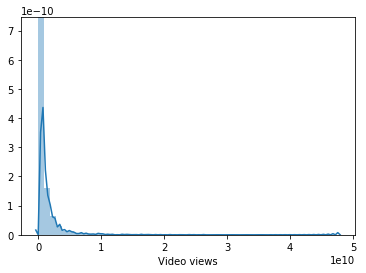

In [65]:
sns.distplot(YouTube1['Video views'])

### Not Normally Distributed; Positively Skewed.  Try a SQRT transformation!

In [66]:
YouTube1['VideoViewsSQRT'] = np.sqrt(YouTube1['Video views'])

C:\Users\meredith.dodd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
YouTube1.head()

,Gr2de,Video views,GradeR,VideoViewsSQRT
0,0,20869786591,A plus plus,144463.789896
1,0,47548839843,A plus plus,218056.964674
2,0,9793305082,A plus plus,98961.129147
3,0,22675948293,A plus plus,150585.352186
4,0,26273668433,A plus plus,162091.543373


C:\Users\meredith.dodd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


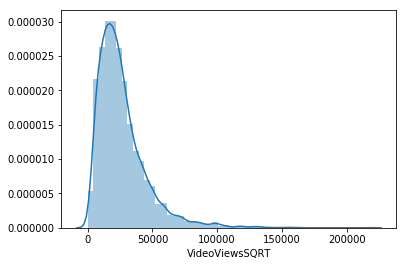

In [68]:
sns.distplot(YouTube1['VideoViewsSQRT'])

In [38]:
### Looking much better, but try a log transformation just in case

In [69]:
YouTube1['VideoViewsLOG'] = np.log(YouTube1['Video views'])

C:\Users\meredith.dodd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
YouTube1.head()

,Gr2de,Video views,GradeR,VideoViewsSQRT,VideoViewsLOG
0,0,20869786591,A plus plus,144463.789896,23.761568
1,0,47548839843,A plus plus,218056.964674,24.585023
2,0,9793305082,A plus plus,98961.129147,23.004965
3,0,22675948293,A plus plus,150585.352186,23.844571
4,0,26273668433,A plus plus,162091.543373,23.991833


C:\Users\meredith.dodd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


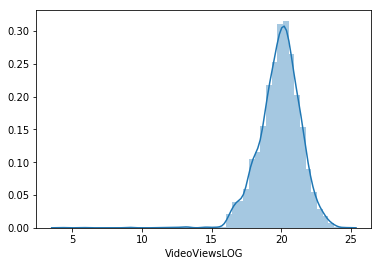

In [42]:
sns.distplot(YouTube1['VideoViewsLOG'])

### That basically ended up as a mirror image, but seems slightly more normal (less of a tail), so stick with LOG

## Homogeneity of Variance

In [71]:
scipy.stats.bartlett(YouTube1['VideoViewsLOG'], YouTube1['Gr2de'])

BartlettResult(statistic=4642.606911455061, pvalue=0.0)

### Does not meet the assumption of homogeneity of variance. Variance is unequal!

# Run the Analysis

In [56]:
YouTubeNatural.dropna(inplace=True)

In [73]:
stats.f_oneway(YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A plus plus'],
                   YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A plus'],
               YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A'],
               YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='B plus'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

# Post Hocs

In [74]:
postHoc = MultiComparison(YouTube1['VideoViewsLOG'], YouTube1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  0      1    -1.5233   -2.76  -0.2865  True 
  0      2     -3.103  -4.2146 -1.9913  True 
  0      3    -4.1291  -5.2399 -3.0184  True 
  1      2    -1.5797   -2.133 -1.0264  True 
  1      3    -2.6059  -3.1573 -2.0544  True 
  2      3    -1.0262  -1.1278 -0.9245  True 
---------------------------------------------


# Conclusions

## Examine Means First

In [75]:
YouTube1.groupby('GradeR').mean()

,Gr2de,Video views,VideoViewsSQRT,VideoViewsLOG
GradeR,,,,
A,2.0,1.676207e+09,34678.089608,20.475580
A plus,1.0,6.053121e+09,70951.341638,22.055279
A plus plus,0.0,2.119909e+10,139631.341341,23.578544
B plus,3.0,5.265217e+08,19943.101566,19.449400


## All grades of YouTube videos significantly differed from each other, with the higher ratings seeming to get the most reviews.